# Unsupervised Machine Learning. 


## Predicitng the optimum number of clusters and representing them visually.


###  Shubham Kumar. 

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
data = pd.read_csv('iris.csv')

In [20]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [22]:
data.drop(['Id'], axis=1, inplace= True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


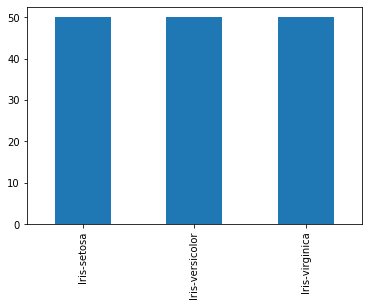

In [24]:
#Visualize the number of different species in pandas
data["Species"].value_counts().plot.bar()
plt.show()

## Univariate Analysis

In [25]:
df = data.drop(["Species"],axis=1)

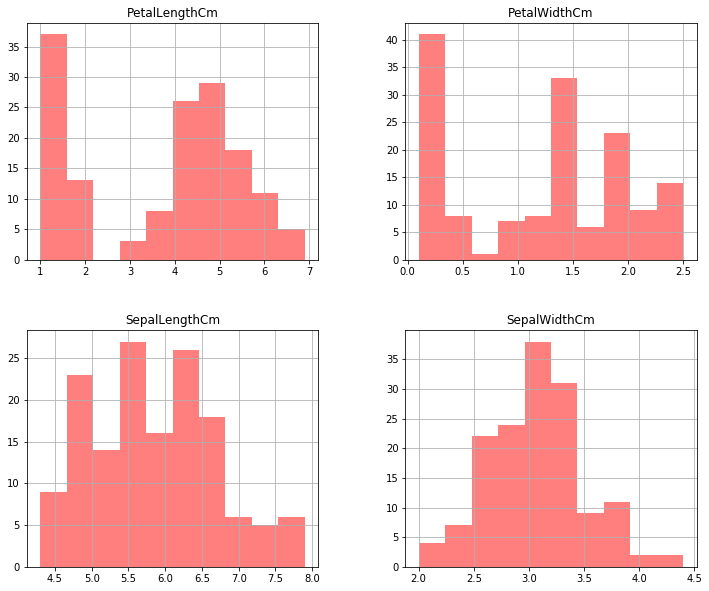

In [26]:
df.hist(color='red', alpha=0.5, figsize=(12,10), bins= 10);

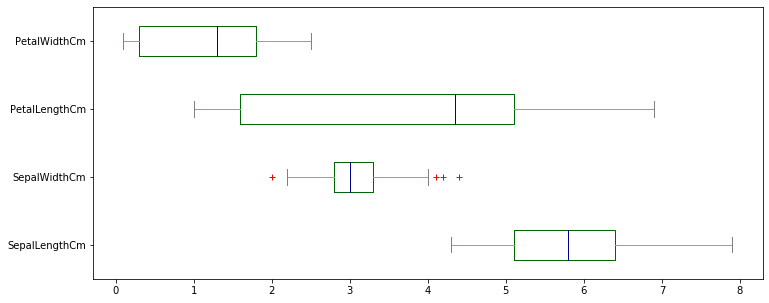

In [27]:
#Boxplot shows us the Outliers and first (lower) quartile, median, third (upper) quartile.

color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

df.plot(kind='box', color=color, vert=False, sym='r+', figsize=(12,5))

## Multivariate Analysis

<Figure size 432x288 with 0 Axes>

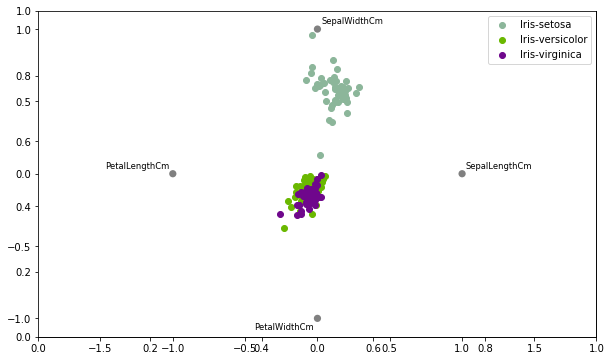

In [37]:
from pandas import read_csv
from pandas.plotting import radviz 
data= read_csv('iris.csv')



data.drop(['Id'], axis=1, inplace= True)

plt.figure()

plt.subplots(figsize=(10, 6))

radviz(data, 'Species')


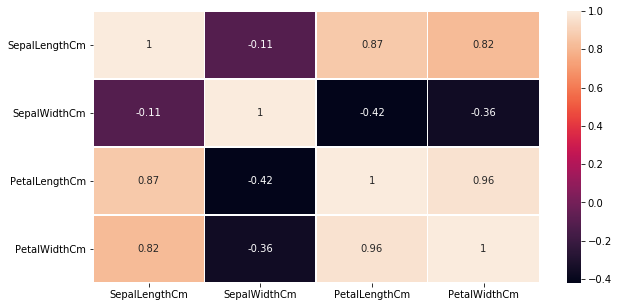

In [29]:
#shows Correlation between Features.
plt.subplots(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, linewidths=.5)

# Cluster Value: 

In [30]:
from sklearn.cluster import KMeans

## The Elbow Method: 

In [31]:
X = data.iloc[:,[0,1,2,3]].values
k_rng = range(1,10)
sse = []  #Error Sum of Squares
for k in k_rng:
    model = KMeans(n_clusters=k)
    model.fit(X)
    sse.append(model.inertia_)

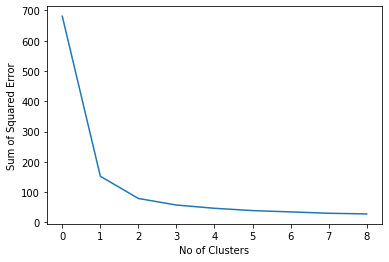

In [32]:
plt.plot(sse)
plt.xlabel('No of Clusters')
plt.ylabel('Sum of Squared Error')
plt.show()


In [34]:
model = KMeans(n_clusters=3)
y_kmeans = model.fit_predict(X)

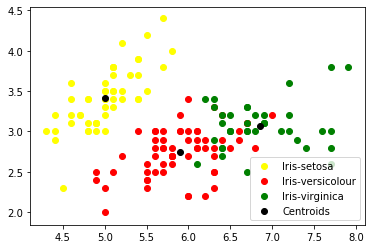

In [35]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], c = 'red', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], c = 'black', label = 'Centroids')
plt.legend()
plt.show()

## Thank You